Original DataFrame:
     name  age  height  weight   bp
0   jade    1      20       0   80
1  vicky   95     180     100  100
2    Sam   22     160      75   65
3   joys    0     145      55   70
4   jeni   60     125      40   40

Reloaded DataFrame:
     name  age  height  weight   bp
0   jade    1      20       0   80
1  vicky   95     180     100  100
2    Sam   22     160      75   65
3   joys    0     145      55   70
4   jeni   60     125      40   40

Numeric Features:
    age   bp  height  weight
0    1   80      20       0
1   95  100     180     100
2   22   65     160      75
3    0   70     145      55
4   60   40     125      40

StandardScaler Result:
 [[-0.94007857  0.45927933 -1.89346102 -1.60356745]
 [ 1.61389211  1.47990005  0.96459335  1.3660019 ]
 [-0.36951065 -0.30618622  0.60733655  0.62360956]
 [-0.96724847 -0.05103104  0.33939396  0.02969569]
 [ 0.66294558 -1.58196213 -0.01786284 -0.41573971]]
Mean (StandardScaler): [-2.22044605e-17 -4.44089210e-17  2.22044605e

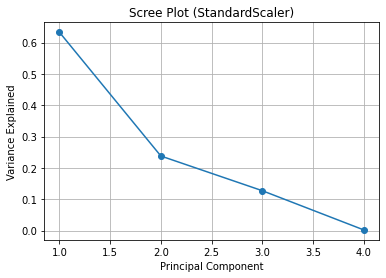

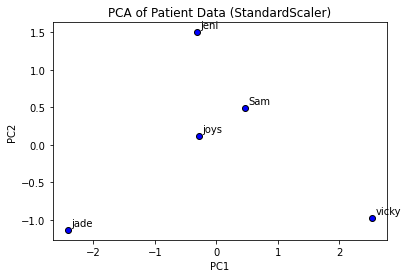

In [2]:
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Create and save data
# -----------------------------
data = {
    'name': ['jade', 'vicky', 'Sam', 'joys', 'jeni'],
    'age': [1, 95, 22, 0, 60],
    'height': [20, 180, 160, 145, 125],
    'weight': [0, 100, 75, 55, 40],
    'bp': [80, 100, 65, 70, 40]
}

frame = DataFrame(data)
print("Original DataFrame:\n", frame)

frame.to_csv('patient_data.csv', index=False)
df = pd.read_csv('patient_data.csv')
print("\nReloaded DataFrame:\n", df)

# -----------------------------
# Step 2: Select numeric features
# -----------------------------
features = ['age', 'bp', 'height', 'weight']
X = df[features]
print("\nNumeric Features:\n", X)

# -----------------------------
# Step 3: StandardScaler
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nStandardScaler Result:\n", X_scaled)

print("Mean (StandardScaler):", X_scaled.mean(axis=0))
print("Std Dev (StandardScaler):", X_scaled.std(axis=0))

# -----------------------------
# Step 4: MinMaxScaler
# -----------------------------
min_max = MinMaxScaler()
X_minmax = min_max.fit_transform(X)
print("\nMinMaxScaler Result:\n", X_minmax)

print("Mean (MinMaxScaler):", X_minmax.mean(axis=0))
print("Std Dev (MinMaxScaler):", X_minmax.std(axis=0))

# -----------------------------
# Step 5: VarianceThreshold
# -----------------------------
sel = VarianceThreshold(threshold=(.5 * (1 - .9)))  # threshold = 0.05

useful_features_std = sel.fit_transform(X_scaled)
print("\nUseful features (StandardScaler):\n", useful_features_std)

useful_features_minmax = sel.fit_transform(X_minmax)
print("\nUseful features (MinMaxScaler):\n", useful_features_minmax)

# -----------------------------
# Step 6: PCA (StandardScaler data)
# -----------------------------
pca = PCA(n_components=None)  # keep all components
X_pca = pca.fit_transform(X_scaled)

print("\nExplained variance ratio:", pca.explained_variance_ratio_)
print("PCA components:\n", pca.components_)

# -----------------------------
# Step 7: Scree Plot
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot (StandardScaler)")
plt.grid(True)
plt.show()

# -----------------------------
# Step 8: PCA Scatter Plot (2D)
# -----------------------------
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c='blue', edgecolor='k')
for i, name in enumerate(df['name']):
    plt.text(X_pca2[i,0]+0.05, X_pca2[i,1]+0.05, name)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Patient Data (StandardScaler)")
plt.show()
